In [58]:
import numpy as np
import pandas as pd

train = pd.read_csv("datasets/digit-recognizer/train.csv")
test  = pd.read_csv("datasets/digit-recognizer/test.csv")


print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [59]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = train.drop('label', axis=1).values 
y = train['label'].values 

In [75]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
import numpy as np
import pandas as pd


y_labels = np.argmax(y, axis=1)

value_counts = pd.Series(y_labels).value_counts().sort_index()
print(value_counts)


0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64


In [62]:
X=X.reshape(-1,28,28,1)
X_test = test.values.reshape(-1, 28, 28, 1) 

In [63]:
X = X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [64]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=10)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\nk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [68]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=10,       
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0.1,          
    shear_range=0.1,        
    horizontal_flip=False   

)
datagen.fit(X_train)


model.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_val, y_val),
          epochs=20)


In [69]:
history = model.fit(
    X_train,y_train,
    epochs=50,
    batch_size=32,
    validation_data=[X_val,y_val],
    callbacks=[early_stop]
    
)

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9528 - loss: 0.1570 - val_accuracy: 0.9790 - val_loss: 0.0669
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9857 - loss: 0.0489 - val_accuracy: 0.9807 - val_loss: 0.0538
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9879 - val_loss: 0.0392
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9916 - loss: 0.0254 - val_accuracy: 0.9890 - val_loss: 0.0394
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9869 - val_loss: 0.0398
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9960 - loss: 0.0138 - val_accuracy: 0.9876 - val_loss: 0.0426
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9898 - val_loss: 0.0332
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9973 - loss: 0.

In [70]:
predictions = model.predict(X_test)
pred_labels = predictions.argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [71]:
test_loss, test_acc = model.evaluate(X_val, y_val)
print("Validation Loss:", test_loss)
print("Validation Accuracy:", test_acc)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9902 - loss: 0.0328
Validation Loss: 0.03278697282075882
Validation Accuracy: 0.9902380704879761


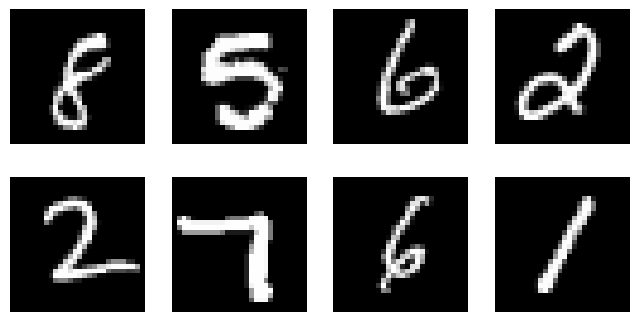

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))  
for i in range(8):
    plt.subplot(2, 4, i+1)  
    plt.imshow(X_train[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()


In [73]:
model.save("digit_recognizer.h5")